In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#from jupyterthemes import jtplot
from sklearn.metrics import auc, roc_curve, roc_auc_score
%matplotlib inline
#jtplot.style()
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None) # display all columns
#pd.set_option('display.max_rows', None) # display all columns
import seaborn as sns

### 1. Загрузить данные из папки Data Folder

In [130]:

df = pd.read_csv('flag.data.txt', sep=",", header=None)

In [131]:
df.columns = ['name',
'landmass',
'zone',
'area',
'population',
'language',
'religion',
'bars',
'stripes',
'colours',
'red',
'green',
'blue',
'gold',
'white',
'black',
'orange',
'mainhue',
'circles',
'crosses',
'saltires',
'quarters',
'sunstars',
'crescent',
'triangle',
'icon',
'animate',
'text',
'topleft',
'botright']

### 2. Провести описательный анализ предложенных данных

In [132]:
df.head(15)

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red
5,Angola,4,2,1247,7,10,5,0,2,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,1,0,0,red,black
6,Anguilla,1,4,0,0,1,1,0,1,3,0,0,1,0,1,0,1,white,0,0,0,0,0,0,0,0,1,0,white,blue
7,Antigua-Barbuda,1,4,0,0,1,1,0,1,5,1,0,1,1,1,1,0,red,0,0,0,0,1,0,1,0,0,0,black,red
8,Argentina,2,3,2777,28,2,0,0,3,2,0,0,1,0,1,0,0,blue,0,0,0,0,0,0,0,0,0,0,blue,blue
9,Argentine,2,3,2777,28,2,0,0,3,3,0,0,1,1,1,0,0,blue,0,0,0,0,1,0,0,0,0,0,blue,blue


In [133]:
#  Впроде пустных нет
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
name          194 non-null object
landmass      194 non-null int64
zone          194 non-null int64
area          194 non-null int64
population    194 non-null int64
language      194 non-null int64
religion      194 non-null int64
bars          194 non-null int64
stripes       194 non-null int64
colours       194 non-null int64
red           194 non-null int64
green         194 non-null int64
blue          194 non-null int64
gold          194 non-null int64
white         194 non-null int64
black         194 non-null int64
orange        194 non-null int64
mainhue       194 non-null object
circles       194 non-null int64
crosses       194 non-null int64
saltires      194 non-null int64
quarters      194 non-null int64
sunstars      194 non-null int64
crescent      194 non-null int64
triangle      194 non-null int64
icon          194 non-null int64
animate       194 non-null int64
te

In [134]:
len(df)

194

In [135]:
 df.describe()

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,3.572165,2.211340,700.046392,23.268041,5.340206,2.190722,0.453608,1.551546,3.463918,0.788660,0.469072,0.510309,0.469072,0.752577,0.268041,0.134021,0.170103,0.149485,0.092784,0.149485,1.386598,0.056701,0.139175,0.252577,0.201031,0.082474
std,1.553018,1.308274,2170.927932,91.934085,3.496517,2.061167,1.038339,2.328005,1.300154,0.409315,0.500334,0.501187,0.500334,0.432631,0.444085,0.341556,0.463075,0.385387,0.290879,0.435860,4.396186,0.231869,0.347025,0.435615,0.401808,0.275798
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,9.000000,0.000000,2.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2.000000,111.000000,4.000000,6.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,4.000000,471.250000,14.000000,9.000000,4.000000,0.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.750000,0.000000,0.000000
max,6.000000,4.000000,22402.000000,1008.000000,10.000000,7.000000,5.000000,14.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,4.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3. Предложить стратегию по работе с категориальными переменными

In [136]:
cat_columns = ['mainhue','topleft','botright','language','landmass','zone']
#Сделаем дамми для категориальных переменных
df_full = pd.get_dummies(df,  columns =cat_columns)

In [137]:
numeric_variables=['area','population']
from sklearn.preprocessing import StandardScaler
#Нормализуем численные переменные
features=df_full[numeric_variables]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df_full[numeric_variables] = features

/Users/gavril/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/gavril/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [138]:
df_full.head()

,name,area,population,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,mainhue_black,mainhue_blue,mainhue_brown,mainhue_gold,mainhue_green,mainhue_orange,mainhue_red,mainhue_white,topleft_black,topleft_blue,topleft_gold,topleft_green,topleft_orange,topleft_red,topleft_white,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white,language_1,language_2,language_3,language_4,language_5,language_6,language_7,language_8,language_9,language_10,landmass_1,landmass_2,landmass_3,landmass_4,landmass_5,landmass_6,zone_1,zone_2,zone_3,zone_4
0,Afghanistan,-0.024036,-0.079262,2,0,3,5,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
1,Albania,-0.309906,-0.221033,6,0,0,3,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,Algeria,0.779538,-0.035640,2,2,0,3,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
3,American-Samoa,-0.323298,-0.253750,1,0,0,5,1,0,1,1,1,0,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,Andorra,-0.323298,-0.253750,0,3,0,3,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0


### 4. Провести углубленный анализ данных (корреляции переменных, визуализация взаимосвязей)

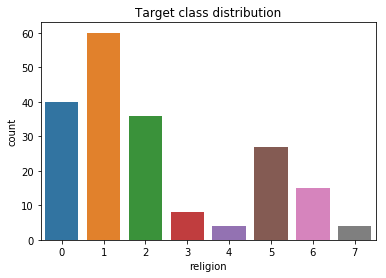

In [179]:
ax = plt.axes()
sns.countplot(x='religion', data=df, ax=ax);
ax.set_title('Target class distribution')
plt.show()

In [180]:
corr = df_full.corr()
corr

,area,population,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,mainhue_black,mainhue_blue,mainhue_brown,mainhue_gold,mainhue_green,mainhue_orange,mainhue_red,mainhue_white,topleft_black,topleft_blue,topleft_gold,topleft_green,topleft_orange,topleft_red,topleft_white,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white,language_1,language_2,language_3,language_4,language_5,language_6,language_7,language_8,language_9,language_10,landmass_1,landmass_2,landmass_3,landmass_4,landmass_5,landmass_6,zone_1,zone_2,zone_3,zone_4
area,1.000000,0.519030,0.087941,0.001243,0.028454,-0.162227,-0.005470,-0.081328,-0.080439,0.014500,-0.098135,-0.119825,-0.050718,-0.005652,-0.057888,-0.025492,-0.001968,0.340572,-0.005049,-0.075366,0.026593,-0.051539,0.024423,-0.024957,-0.067191,-0.029438,-0.053988,0.025614,0.050304,0.075096,-0.008041,-0.060000,-0.040538,-0.024590,0.039092,0.050304,0.110524,-0.088647,0.001172,-0.075264,-0.014991,-0.045050,-0.010185,-0.020945,0.132225,-0.051944,-0.007840,0.000475,-0.048265,-0.051087,0.337619,-0.006995,0.113895,-0.002538,-0.020390,-0.076133,0.015992,0.073147,-0.121454,-0.046319,0.121121,-0.025865,0.016442,-0.010998,0.059662,-0.045206
population,0.519030,1.000000,0.172731,-0.041392,0.030100,-0.115052,-0.024648,-0.047918,-0.060222,-0.002184,-0.092640,-0.103552,0.050497,0.051257,-0.076305,-0.059061,-0.041349,0.191377,-0.015544,-0.078156,0.017966,-0.082259,-0.025194,0.000944,-0.100282,-0.016994,-0.058836,-0.020452,0.247607,0.058812,0.011364,-0.030387,-0.051771,-0.023252,-0.019021,0.247607,0.078525,-0.075591,-0.025767,-0.110812,-0.022559,-0.024698,0.037972,-0.015910,0.099872,-0.005876,-0.086959,-0.033767,-0.055777,-0.015459,0.095307,0.079908,0.372216,-0.051081,0.033992,-0.046832,-0.052209,-0.025558,-0.048152,-0.095556,0.251150,-0.044250,0.140760,-0.056404,-0.031120,-0.090809
religion,0.087941,0.172731,1.000000,-0.060000,0.103222,-0.017720,0.121721,0.128843,-0.154891,0.023334,-0.167605,0.074055,-0.051215,0.123260,-0.225238,-0.133373,-0.135713,-0.075081,0.053145,0.056868,0.055714,-0.002741,-0.055158,-0.015089,-0.214613,0.040176,0.011610,0.089556,0.021828,0.085669,0.014266,0.059446,-0.085725,-0.132436,0.046594,0.021828,0.134565,-0.091014,0.051062,-0.146088,0.064999,0.062983,0.157238,-0.076704,-0.037500,-0.028751,-0.182309,-0.322844,0.024454,-0.074505,0.268847,-0.136763,0.110049,-0.030568,0.127693,0.396316,-0.279955,-0.268171,-0.102209,0.362746,0.272532,-0.171626,0.239376,0.186126,-0.264794,-0.246794
bars,0.001243,-0.041392,-0.060000,1.000000,-0.273371,-0.064574,-0.017093,0.116905,-0.128510,0.037118,-0.198697,-0.029076,0.046841,-0.096650,-0.144432,-0.140070,-0.150604,-0.114667,0.021743,-0.132973,-0.002598,0.016260,0.067709,-0.008419,-0.124800,-0.044702,0.274309,0.094244,-0.063550,-0.157116,0.078807,-0.009159,0.089810,0.036752,0.180837,-0.063550,-0.059335,-0.177966,-0.072942,-0.154727,0.103120,0.045375,0.035132,0.176982,0.111257,-0.065329,-0.077950,-0.008423,0.321924,-0.078246,-0.063550,0.046690,-0.063550,-0.094083,-0.063550,-0.010134,0.053493,-0.030124,0.079262,0.128237,-0.132768,-0.148492,-0.032696,-0.057993,-0.077036,0.127099
stripes,0.028454,0.030100,0.103222,-0.273371,1.000000,0.038278,0.014210,-0.085367,0.126104,-0.031987,0.125907,0.091814,-0.106477,-0.087479,-0.190550,-0.190735,0.091941,0.215486,-0.010242,-0.005719,-0.107426,-0.157922,-0.111564,0.017404,-0.027775,-0.068197,-0.040924,-0.073295,0.043644,0.105258,-0.007939,0.077238,0.188576,-0.003966,-0.069681,0.043644,0.039747,-0.231711,0.095370,0.026307,-0.068197,-0.031282,0.032584,-0.048098,-0.074459,0.028450,-0.164168,0.188755,-0.089316,0.060148,-0.018843,-0.046333,-0.065708,0.011357,-0.050086,0.133770,-0.018769,0.083407,-0.053713,0.101837,0.024869,-0.168136,-0.005297,-0.006194,0.033694,-0.009648
colours,-0.162227,-0.115052,-0.017720,-0.064574,0.038278,1.000000,0.311759,0.428388,0.294779,0.500073,0.2143

Text(0,0.5,'corr')

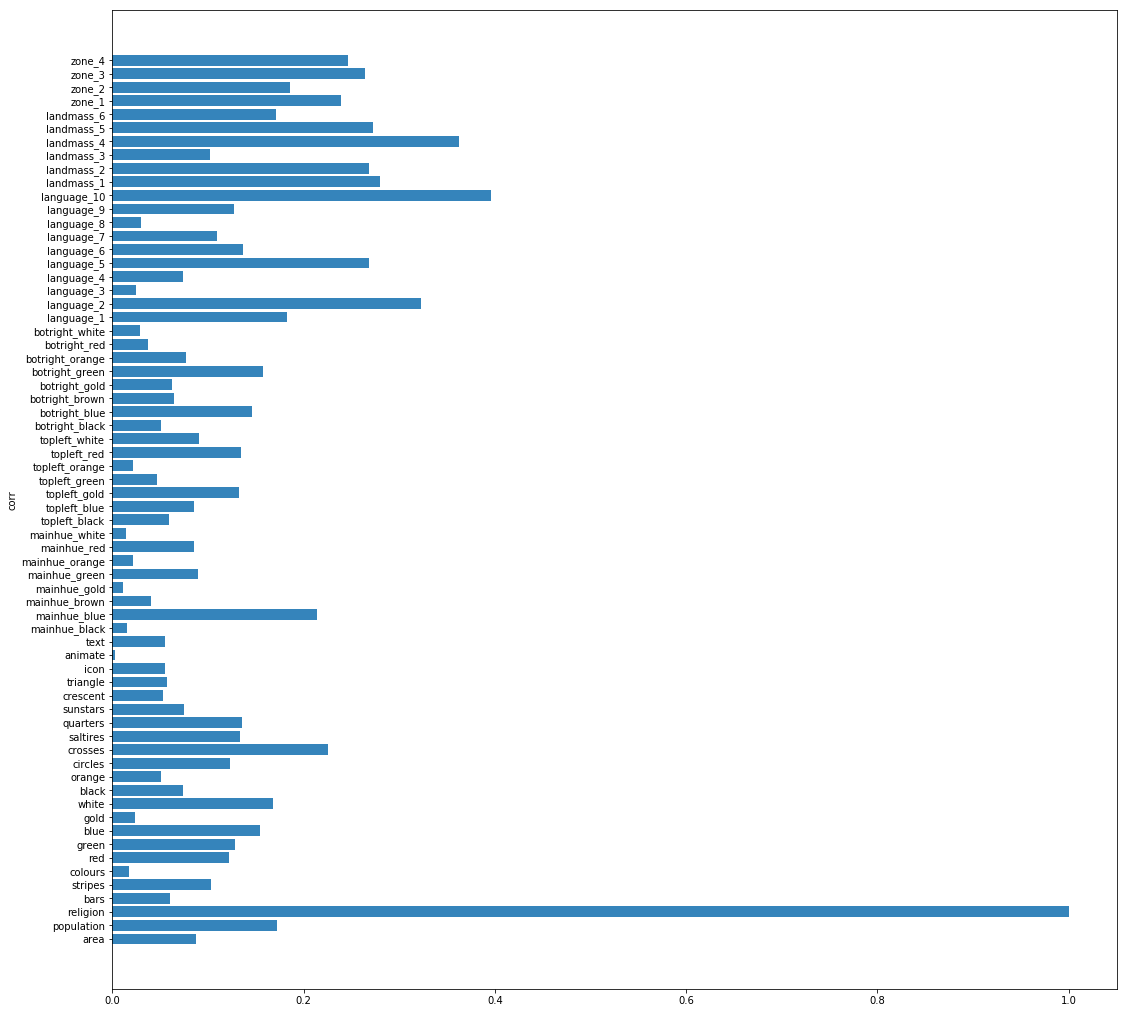

In [178]:

f, ax = plt.subplots(figsize=(18,18))
plt.barh(corr['religion'].index,abs(corr['religion']), align='center', alpha=0.9)
#plt.xticks(y_pos, objects)
plt.ylabel('corr')


In [114]:
df_full.head()

,area,population,bars,stripes,colours,red,green,blue,gold,white,black,orange,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,mainhue_black,mainhue_blue,mainhue_brown,mainhue_gold,mainhue_green,mainhue_orange,mainhue_red,mainhue_white,topleft_black,topleft_blue,topleft_gold,topleft_green,topleft_orange,topleft_red,topleft_white,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white,language_1,language_2,language_3,language_4,language_5,language_6,language_7,language_8,language_9,language_10,landmass_1,landmass_2,landmass_3,landmass_4,landmass_5,landmass_6,zone_1,zone_2,zone_3,zone_4
0,-0.024036,-0.079262,0,3,5,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
1,-0.309906,-0.221033,0,0,3,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,0.779538,-0.035640,2,0,3,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
3,-0.323298,-0.253750,0,0,5,1,0,1,1,1,0,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,-0.323298,-0.253750,3,0,3,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [182]:
del df_full["name"]
y = df_full["religion"]
del df_full["religion"]

In [183]:
X=df_full

In [199]:

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X ,y, test_size=0.33,random_state=42)

### 5. Следует ли увеличивать/уменьшать размерность признакового множества (какой подход выдает лучшие результаты)

Text(0,0.5,'explained_variance_ratio_')

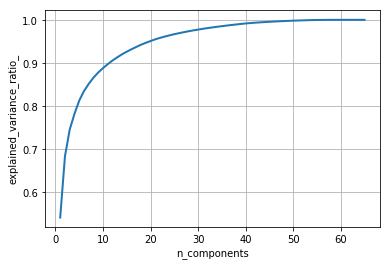

In [200]:
from sklearn.decomposition import PCA, KernelPCA
pca = PCA().fit(X)

cum_evr = np.cumsum(pca.explained_variance_ratio_)
xs = np.arange(cum_evr.size) + 1
plt.plot(xs, cum_evr, linewidth=2)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [201]:
# Возьмем 30 компонент
from sklearn.decomposition import PCA, KernelPCA

components = 30
pca = PCA(n_components=components).fit(X)
X_PCA=pd.DataFrame(PCA(n_components=components).fit_transform(X))
sum(pca.explained_variance_ratio_)

0.9773241239663493

In [202]:
from sklearn.model_selection import train_test_split
X_train_PCA, X_valid_PCA, y_train_PCA, y_valid_PCA = train_test_split(X_PCA ,y, test_size=0.33,random_state=42)

In [211]:
# обучим лес чтобы сранить модели с разными фичами

from sklearn.model_selection import GridSearchCV
forest_params = {
    'n_estimators': [5, 10, 20, 40],
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 3, 5, 7, 9, None],
    'min_samples_leaf': [1, 2, 4, 8, 16]
}
forest = RandomForestClassifier()
grid_forest = GridSearchCV(forest, forest_params, scoring='accuracy', cv=3)
grid_forest.fit(X_train, y_train)
print(grid_forest.best_params_)
print('Accuracy_train: ',grid_forest.best_score_)
print(grid_forest.best_estimator_)
print('Accuracy_test: ',grid_forest.score(X_valid,y_valid))

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 40}
Accuracy_train:  0.7054263565891473
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Accuracy_test:  0.6923076923076923


In [212]:
# Не очень нам pca  улчшает результаты
from sklearn.model_selection import GridSearchCV
forest_params = {
    'n_estimators': [5, 10, 20, 40],
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 3, 5, 7, 9, None],
    'min_samples_leaf': [1, 2, 4, 8, 16]
}
forest = RandomForestClassifier()
grid_forest = GridSearchCV(forest, forest_params, scoring='accuracy', cv=3)
grid_forest.fit(X_train_PCA, y_train_PCA)
print(grid_forest.best_params_)
print('Accuracy_train: ',grid_forest.best_score_)
print(grid_forest.best_estimator_)
print('Accuracy_test: ',grid_forest.score(X_valid_PCA,y_valid_PCA))

{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1, 'n_estimators': 40}
Accuracy_train:  0.5193798449612403
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Accuracy_test:  0.6


0.4745762711864407



### 6. Следует ли балансировать классы путем oversampling/undersampling? (улучшает ли подход результаты

In [209]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
ros = RandomOverSampler(random_state=0)
ros.fit(X_train, y_train)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [56]:
print(len(X_train))
print(len(X_resampled))


135
328


In [68]:
os_data_y= pd.DataFrame(data=y_resampled,columns=['y'])
os_data_y.y.value_counts()

7    41
6    41
5    41
4    41
3    41
2    41
1    41
0    41
Name: y, dtype: int64

In [213]:
#  OverSampler тоже не увеличил занчимо точность на тестовом сете
from sklearn.ensemble import RandomForestClassifier
clf_lr = RandomForestClassifier()

from sklearn.model_selection import GridSearchCV
forest_params = {
    'n_estimators': [5, 10, 20, 40],
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 3, 5, 7, 9, None],
    'min_samples_leaf': [1, 2, 4, 8, 16]
}
forest = RandomForestClassifier()
grid_forest = GridSearchCV(forest, forest_params, scoring='accuracy', cv=3)
grid_forest.fit(X_resampled, y_resampled)
print(grid_forest.best_params_)
print('Accuracy_train: ',grid_forest.best_score_)
print(grid_forest.best_estimator_)
print('Accuracy_test: ',grid_forest.score(X_valid,y_valid))

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 40}
Accuracy_train:  0.928030303030303
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Accuracy_test:  0.6615384615384615



### 7. Сделать кросс-валидацию данных с использованием подхода K-fold (n_folds=3)

In [ ]:
Кросс-валидацию внутри GridSearchCV уже проводится

### 8. Решить задачу мультиклассовой классификации и предсказать религию страны (religion) по деталям ее флагаЪ

Переберем различные классфикаторы

In [217]:
from sklearn.model_selection import GridSearchCV
forest_params = {
    'n_estimators': [5, 10, 20, 40],
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 3, 5, 7, 9, None],
    'min_samples_leaf': [1, 2, 4, 8, 16]
}
forest = RandomForestClassifier()
grid_forest = GridSearchCV(forest, forest_params, scoring='accuracy', cv=3)
grid_forest.fit(X_train, y_train)
print(grid_forest.best_params_)
print('Accuracy_train: ',grid_forest.best_score_)
print(grid_forest.best_estimator_)
print('Accuracy_test: ',grid_forest.score(X_valid,y_valid))

{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1, 'n_estimators': 40}
Accuracy_train:  0.7054263565891473
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Accuracy_test:  0.676923076923077


In [219]:
from sklearn.tree import DecisionTreeClassifier
tree_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 3, 5, 7, 9, None],
    'min_samples_leaf': [1, 2, 4, 8, 16]
}
tree = DecisionTreeClassifier()
grid_tree = GridSearchCV(tree, tree_params, scoring='accuracy', cv=3)
grid_tree.fit(X_train, y_train)
print(grid_tree.best_params_)
print('Accuracy_train: ',grid_tree.best_score_)
print(grid_tree.best_estimator_)
print('Accuracy_test: ',grid_tree.score(X_valid,y_valid))

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 8}
Accuracy_train:  0.6589147286821705
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy_test:  0.6153846153846154


In [220]:
from sklearn.neighbors import KNeighborsClassifier
knn_params = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'p': [1, 2]
}
knn = KNeighborsClassifier(metric='minkowski')
grid_knn = GridSearchCV(knn, knn_params, scoring='accuracy', cv=3)
grid_knn.fit(X_train, y_train)
print(grid_knn.best_params_)
print('Accuracy_train: ',grid_knn.best_score_)
print(grid_knn.best_estimator_)
print('Accuracy_test: ',grid_knn.score(X_valid,y_valid))


{'n_neighbors': 1, 'p': 1}
Accuracy_train:  0.5891472868217055
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=1,
           weights='uniform')
Accuracy_test:  0.5076923076923077


In [221]:
from sklearn.svm import SVC
svc_params = {
    'C': [0.001, 0.01, 0.1, 0.25, 0.5],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
svc = SVC()
grid_svc = GridSearchCV(svc, svc_params, scoring='accuracy', cv=3)
grid_svc.fit(X_train, y_train)
print(grid_svc.best_params_)
print('Accuracy_train: ',grid_svc.best_score_)
print(grid_svc.best_estimator_)
print('Accuracy_test: ',grid_svc.score(X_valid,y_valid))

{'C': 0.1, 'kernel': 'linear'}
Accuracy_train:  0.6201550387596899
SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Accuracy_test:  0.6615384615384615


In [222]:
from sklearn.linear_model import LogisticRegression

lr_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 0.25, 0.5]
}
lr = LogisticRegression(multi_class='ovr', solver='liblinear')
grid_lr = GridSearchCV(lr, lr_params, scoring='accuracy', cv=10)
grid_lr.fit(X_train, y_train)
print(grid_lr.best_params_)
print('Accuracy_train: ',grid_lr.best_score_)
print(grid_lr.best_estimator_)
print('Accuracy_test: ',grid_lr.score(X_valid,y_valid))


{'C': 0.5, 'penalty': 'l1'}
Accuracy_train:  0.6589147286821705
LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)
Accuracy_test:  0.6153846153846154


In [223]:
#Лушчую точность дает лес
estimators = {
    'regression': grid_lr,
    'svm': grid_svc,
    'knn': grid_knn,
    'tree': grid_tree,
    'forest': grid_forest
}
for k in estimators:
    v = estimators[k]
    print(k, "CV Accuracy:", v.best_score_, "Validation Accuracy:", v.best_estimator_.score(X_valid, y_valid))

regression CV Accuracy: 0.6589147286821705 Validation Accuracy: 0.6153846153846154
svm CV Accuracy: 0.6201550387596899 Validation Accuracy: 0.6615384615384615
knn CV Accuracy: 0.5891472868217055 Validation Accuracy: 0.5076923076923077
tree CV Accuracy: 0.6589147286821705 Validation Accuracy: 0.6153846153846154
forest CV Accuracy: 0.7054263565891473 Validation Accuracy: 0.676923076923077


### 9. Рассчитать Feature Importances для переменных модели

In [267]:
imp = pd.Series(grid_forest.best_estimator_.feature_importances_,index=df_full.columns)
imp=imp.sort_values(ascending=False)[:15]

Text(0,0.5,'Feature Importances')

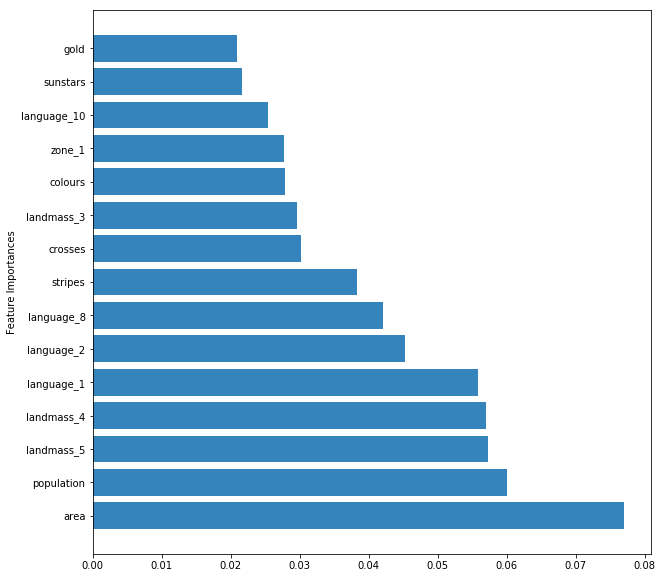

In [268]:
f, ax = plt.subplots(figsize=(10,10))
plt.barh(imp.index,imp, align='center', alpha=0.9)
#plt.xticks(y_pos, objects)
plt.ylabel('Feature Importances')



### 10. Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall

In [252]:
#  Accuracy мы уже ранее считали
from sklearn.metrics import classification_report
print(classification_report(grid_forest.best_estimator_.predict(X_valid), y_valid))

              precision    recall  f1-score   support

           0       0.83      0.67      0.74        15
           1       0.78      0.81      0.79        26
           2       0.71      0.56      0.63         9
           3       0.50      0.50      0.50         2
           4       0.00      0.00      0.00         0
           5       0.60      0.60      0.60        10
           6       0.20      0.33      0.25         3

   micro avg       0.68      0.68      0.68        65
   macro avg       0.52      0.49      0.50        65
weighted avg       0.72      0.68      0.69        65



/Users/gavril/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/gavril/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/gavril/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### 11. Построить Confusion Matrix для ваших результатов

In [253]:
from sklearn.metrics import confusion_matrix

In [254]:
print(confusion_matrix(grid_forest.best_estimator_.predict(X_valid), y_valid))

[[10  3  0  0  0  0  2]
 [ 1 21  0  1  2  1  0]
 [ 0  0  5  0  0  3  1]
 [ 0  0  0  1  0  0  1]
 [ 0  0  0  0  0  0  0]
 [ 0  2  2  0  0  6  0]
 [ 1  1  0  0  0  0  1]]


Confusion matrix, without normalization
[[10  3  0  0  0  0  2]
 [ 1 21  0  1  2  1  0]
 [ 0  0  5  0  0  3  1]
 [ 0  0  0  1  0  0  1]
 [ 0  0  0  0  0  0  0]
 [ 0  2  2  0  0  6  0]
 [ 1  1  0  0  0  0  1]]


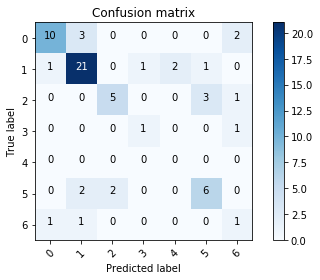

In [264]:
plot_confusion_matrix(confusion_matrix(grid_forest.best_estimator_.predict(X_valid), y_valid),range(0,7))

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()